Сгенерируем выборку для задачи регрессии и визуализируем данные.

(100,)
(100, 1)


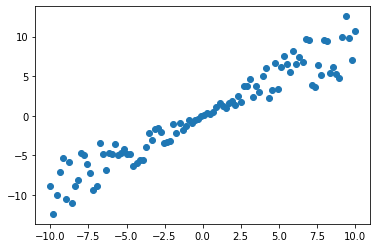

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)


plt.scatter(X, y)

Реализуем алгоритм стохастического градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки:

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, то есть $X$ — матрица «объект — признак», $w$ — вектор весов модели. 
*  $Xw$ — вектор предсказания модели;
*  $y$ — вектор правильных ответов,
и квадратичная ошибка — это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в Python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеки NumPy — numpy.linalg.norm.

In [ ]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем стохастический градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev},x_i,y_i),$$

где 
*   $\nabla_w Q(w,x_i,y_i)$ — значение градиента функции потерь (в данном случае MSE) на объекте $x_i$;
*   объект $x_i$ случайным образом выбирается на каждой итерации метода.

Вычислим градиент MSE на случайном объекте $x_i$ по формуле производной сложной функции:
$$\nabla_w (x_iw - y_i) ^ 2 = 2x_i(x_iw-y_i).$$

Итак, реализуем метод стохастического градиентного спуска:

*  Первым шагом добавим к матрице $X$ единичный столбец — это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В Python скалярное произведение можно записать так: $w@x$.

*  Затем инициализируем случайным образом вектор весов params.

*  Зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации.

*  Наконец, в цикле по количеству эпох (итераций) каждый раз будем выбирать случайный объект с индексом ind и обновлять веса по формуле стохастического градиентного спуска.

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        ind = random.sample(range(X.shape[0]),1)

        params = params - 2 * learning_rate * (X[ind] * ((X[ind] @ params) - y[ind]))
        params = params.ravel() 
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели.

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск.

In [ ]:
track, weights = stochastic_gradient_descent(X, y, 0.01, 100)

Сделаем предсказание.

In [ ]:
pred = predict(X, weights)

Добавим к графику полученную регрессионную прямую.

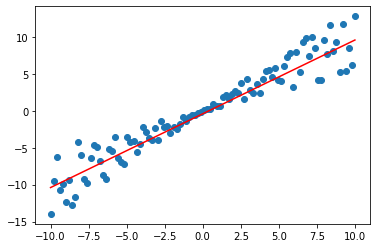

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')